In [47]:
#importing libraries

import random as rd
import hashlib
import phe
import rsa
import matplotlib.pyplot as plt
import numpy as np
from timeit import default_timer as timer


In [48]:
#declaring of varibles
numberOfExperts = 0
numberOfCandidates = 0
keySize = 0
#collection of homomophic public and private keys
dictionaryOfExpertPublicKeys = {}
dictionaryOfExpertPrivateKeys = {}

dictionaryOfCandidatesPublicKeys = {}
dictionaryOfCandidatesPrivateKeys = {}

#Variables for third framework@
dictionaryOfRandomNumberPerExpert = {}
dictionaryOftheSumOfRandomNumbermappedToEveryCandidate = {}
dictionaryOfRandomNumberGatheredFromOtherExperts = {}
dictionaryOfRandomNumberMappedToEveryCandidate = {}

#Collection of rsa public and private keys for digital signature
dictOfrsaPubKey = {}
dictOfrsaPriKey = {}
marksToCandidates1 = []
marksToCandidates2 = []
marksToCandidates3 = []
marksToCandidates4 = []
MatrixOfMarks = []


In [49]:
def initVariables(E, C, key):
    global numberOfExperts, numberOfCandidates,keySize
    numberOfExperts, numberOfCandidates,keySize = E, C, key

In [50]:
#this part of the code create the public and private homomorphic key pairs
def generateHomomorphickeyPairs():
    global publicKeyEmployer,privateKeyEmployer
    publicKeyEmployer,privateKeyEmployer = phe.generate_paillier_keypair(n_length=keySize)
    for i in range(numberOfExperts):
        x,y = phe.generate_paillier_keypair(n_length=keySize)
        dictionaryOfExpertPublicKeys[i] = x
        dictionaryOfExpertPrivateKeys[i] = y
        
    for i in range(numberOfCandidates):
        x,y = phe.generate_paillier_keypair(n_length=keySize)
        dictionaryOfCandidatesPublicKeys[i]= x
        dictionaryOfCandidatesPrivateKeys[i] = y 

In [51]:
#code to generate rsa public and private keys
def generateRSAKeys():
    global dictOfrsaPubKey, dicOfrsaPriKey
    for i in range(numberOfExperts):
        (pubkey, privkey) = rsa.newkeys(512)
        dictOfrsaPubKey[i],dictOfrsaPriKey[i] = pubkey, privkey 

In [52]:
def giveMarksToAll():
    # this function generates a unique matrix of number to useers in range 1 to 10
    global MatrixOfMarks
    MatrixOfMarks  = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            MatrixOfMarks[i][j] = rd.randint(0,10)

In [53]:
# function to create digital signature
def createDigitalSignature(message,i):
    privkey = dictOfrsaPriKey[i]
    temp = str(message).encode()
    signature = rsa.sign(temp, privkey, 'SHA-1')
    return signature

code for framework 1


In [54]:
#this part of the code finds the highest marks gaining candidate id this acts as the candidate manager for the first frame work
def candidateManagerFrameWork1BestCandidate():
    array  = []
    for i in range(len(marksToCandidates1[0])):
        sum = 0
        for j in range(len(marksToCandidates1)):
                sum = sum + marksToCandidates1[j][i][0]
        array.append(sum)
    return array

In [55]:
def employerSelectsBestCandidate(array):
    return array.index(max(array))

In [56]:
#this part of the code defines the first frame work
def expertFunctionToGiveMarks1():
    global marksToCandidates1
    marksToCandidates1 = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = MatrixOfMarks[i][j]
            marksToCandidates1[i][j] = [mark,createDigitalSignature(mark,i)]
    end = timer()
    return (end - start)

code for framework 2

In [57]:
def employerFindingBestCandidate2(array):
    array = [privateKeyEmployer.raw_decrypt(x) for x in array]
    return array.index(max(array))
    

In [58]:
def candidateManagerFrameWork2BestCandidate():
    array  = []
    for i in range(len(marksToCandidates2[0])):
        sum = 1
        for j in range(len(marksToCandidates2)):
            sum = sum * marksToCandidates2[j][i][0]
        array.append(sum)
    return array

In [59]:
def expertFunctionToGiveMarks2():
    global marksToCandidates2
    marksToCandidates2 = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    start = timer()
    #this part of code simulates the expert giving marks to the candidates and storing them in form of matrix
    for i in range(numberOfExperts):
        for j in range(numberOfCandidates):
            mark = MatrixOfMarks[i][j]
            encryptedMark = publicKeyEmployer.raw_encrypt(mark)
            marksToCandidates2[i][j] = [encryptedMark,createDigitalSignature(encryptedMark,i)]
    end = timer()
    return(end - start)

In [60]:
def calculateResultsForFrameWorks2CandVariable(experts):
    t2 = expertFunctionToGiveMarks2()
    start = timer()
    array = candidateManagerFrameWork2BestCandidate()
    employerFindingBestCandidate2(array)
    end = timer()
    t3 = end - start
    totalTime = (t2/experts) + t3
    return totalTime

In [61]:
def calculateResultsForFrameWorks2ExpertVariable(experts,i):
    t2 = expertFunctionToGiveMarks2()
    start = timer()
    array = candidateManagerFrameWork2BestCandidate()
    # employerFindingBestCandidate2(array)
    end = timer()
    t3 = end - start
    totalTime = (t2/experts[i]) + t3
    return totalTime

code for framework3

In [62]:
def generateRandomNumberForEveryExpert():
    # global dictionaryOfRandomNumberPerExpert
    generatedRandomNumbers = [rd.randint(0,100) for x in range(numberOfExperts)]
    # print(generatedRandomNumbers)
    return generatedRandomNumbers
    # print(dictionaryOfSumGeneratedPerRandomNumber)

In [63]:
def forwardTheRespectiveRandomNumbers(idR,generatedRandomNumbers):
    encryptedRandomNumber = dictionaryOfExpertPublicKeys[idR].raw_encrypt(generatedRandomNumbers[idR])
    message = encryptedRandomNumber
    return message
# ,createDigitalSignature(encryptedRandomNumber,idS)

In [64]:
def performSMPCBetweenExperts():
    #this part of the code simulates the part where expert follow the smpc process
    #the random number assgned by all the experts has been mapped for every candidate
    # here the outer loop shows for which candidate the random number are being genereated and jth looop shows expert j is generating the random number for expert k and and passing it to expert k
    
    for i in range(numberOfCandidates):
        matrixOfForwardedMessages = [[0 for i in range(numberOfExperts)] for j in range(numberOfExperts)]
        sumList = []
        for j in range(numberOfExperts):
            generatedRandomNumbers = generateRandomNumberForEveryExpert()
            sumOfTheRandomNumbers = sum(generatedRandomNumbers) 
            sumList.append(sumOfTheRandomNumbers)

            for k in range(numberOfExperts):
                if(j != k):
                    message = forwardTheRespectiveRandomNumbers(k,generatedRandomNumbers)
                    matrixOfForwardedMessages[j][k] = message
                else:
                    # matrixOfForwardedMessages consist all random number such that from expert j to expert k
                    matrixOfForwardedMessages[j][k] = generatedRandomNumbers[j]
        dictionaryOfRandomNumberMappedToEveryCandidate[i] = matrixOfForwardedMessages
        dictionaryOftheSumOfRandomNumbermappedToEveryCandidate[i] = sumList
    # print(dictionaryOfRandomNumberMappedToEveryCandidate)
    # print(dictionaryOftheSumOfRandomNumbermappedToEveryCandidate)
    # print(dictionaryOfSumGeneratedPerRandomNumber)
    

    

In [65]:
# here in this code the outer lopp shows for whom the marks are being given , innner j loop shows expert j is giving the marks and kth loop shows other experts whp sent random number to j in smpc fuicntion
def generateHiddenScoreFrameWork3():
    global marksToCandidates3
    marksToCandidates3 = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfCandidates):
        for j in range(numberOfExperts):
            mark = MatrixOfMarks[j][i]
            hiddenScore = mark + dictionaryOftheSumOfRandomNumbermappedToEveryCandidate[i][j]
            sum  = 0
            for k in range(numberOfExperts):
                if(j != k):
                    encryptedRandomNumber = dictionaryOfRandomNumberMappedToEveryCandidate[i][k][j]
                    # print(encryptedRandomNumber)
                    sum  = sum + dictionaryOfExpertPrivateKeys[j].raw_decrypt(encryptedRandomNumber)
                else: 
                    sum = sum + dictionaryOfRandomNumberMappedToEveryCandidate[i][j][j]
            hiddenScore  = hiddenScore -sum
            # print(hiddenScore)
            # marksToCandidates contains matrix where j is the expert and i is candidate and what j gave to i isthe entry
            marksToCandidates3[j][i] = [hiddenScore, createDigitalSignature(hiddenScore,j)]
            


In [66]:
def candidateManagerFrameWork3BestCandidate():
    array = []
    for i in range(numberOfCandidates):
        sum = 0
        for j in range(numberOfExperts):
            cummulativeScore = marksToCandidates3[j][i][0]
            sum  = sum + cummulativeScore
        array.append(sum)
    # print(array)
    # print(array.index(max(array)))

In [67]:
def expertFunctionToGiveMarks3():
    start = timer()
    generateHiddenScoreFrameWork3()
    end = timer()
    return end - start


frameworks of 4

In [68]:
def generateHiddenScoreFrameWork4():
    global marksToCandidates4
    marksToCandidates4 = [[0 for i in range(numberOfCandidates)] for j in range(numberOfExperts)]
    for i in range(numberOfCandidates):
        for j in range(numberOfExperts):
            mark = MatrixOfMarks[j][i]
            hiddenScore = mark + dictionaryOftheSumOfRandomNumbermappedToEveryCandidate[i][j]
            sum  = 0
            for k in range(numberOfExperts):
                if(j != k):
                    encryptedRandomNumber = dictionaryOfRandomNumberMappedToEveryCandidate[i][k][j]
                    # print(encryptedRandomNumber)
                    sum  = sum + dictionaryOfExpertPrivateKeys[j].raw_decrypt(encryptedRandomNumber)
                else: 
                    sum = sum + dictionaryOfRandomNumberMappedToEveryCandidate[i][j][j]
            hiddenScore  = hiddenScore -sum
            # print(hiddenScore)
            marksToCandidates4[j][i] = [publicKeyEmployer.raw_encrypt(hiddenScore),createDigitalSignature(publicKeyEmployer.raw_encrypt(hiddenScore),j)]

In [69]:
def candidateManagerFrameWork4BestCandidate():
    array = []
    for i in range(numberOfCandidates):
        sum = 1
        for j in range(numberOfExperts):
            cummulativeScore = marksToCandidates4[j][i][0]
            sum  = sum * cummulativeScore
        array.append(sum)
    return array


In [70]:
def employerFindsTheBestCandidate4(array):
    marksOfCandidates = [privateKeyEmployer.raw_decrypt(x) for x in array]
    # print(marksOfCandidates)
    # print(marksOfCandidates.index(max(marksOfCandidates)))

In [71]:
def expertFunctionToGiveMarks4():
    start = timer()
    generateHiddenScoreFrameWork4()
    end = timer()
    return end - start

In [72]:
def calculateResultsForFrameWork1CandVariable(experts):
            t2 = expertFunctionToGiveMarks1()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime =  (t2 / experts) + t3
            return (totalTime)

In [73]:
def calculateResultsForFrameWork1ExpertVariable(experts, i):
            t2 = expertFunctionToGiveMarks1()
            start = timer()
            array = candidateManagerFrameWork1BestCandidate()
            employerSelectsBestCandidate(array)
            end = timer()
            t3 = end - start
            totalTime = (t2 / experts[i]) + t3
            return (totalTime)


In [74]:
def calculateResultsForFrameWorks2CandVariable(experts):
    t2 = expertFunctionToGiveMarks2()
    start = timer()
    array = candidateManagerFrameWork2BestCandidate()
    employerFindingBestCandidate2(array)
    end = timer()
    t3 = end - start
    totalTime = (t2/experts) + t3
    return totalTime

In [75]:
def calculateResultsForFrameWorks2ExpertVariable(experts,i):
    t2 = expertFunctionToGiveMarks2()
    start = timer()
    array = candidateManagerFrameWork2BestCandidate()
    # employerFindingBestCandidate2(array)
    end = timer()
    t3 = end - start
    totalTime = (t2/experts[i]) + t3
    return totalTime

In [76]:
def SMPCandHiddenScoreGeneratorfor3and4VaribleCandidates(experts ):
    start = timer()
    performSMPCBetweenExperts()
    end = timer()
    t2 = end - start
    time3, time4,t3, t4  =0, 0,0,0
    for m in range(0,2):
                if m == 0:
                    t3 = expertFunctionToGiveMarks3()
                    start = timer()
                    candidateManagerFrameWork3BestCandidate()
                    end = timer()
                    t4 = end - start
                    time3 = t2 + (t3/ experts) + t4
                else:
                    t3 = expertFunctionToGiveMarks4()
                    start = timer()
                    array = candidateManagerFrameWork4BestCandidate()
                    employerFindsTheBestCandidate4(array)
                    end = timer()
                    t4 = end - start
                    time4 =t2 + (t3/ experts) + t4
    return time3, time4

In [77]:
def SMPCandHiddenScoreGeneratorfor3and4VaribleExperts(experts,i):
    start =  timer()
    performSMPCBetweenExperts()
    end = timer()
    t2 = end - start
    time3, time4,t3, t4  =0, 0,0,0
    for m in range(0,2):
                if m == 0:
                    t3 = expertFunctionToGiveMarks3()
                    start = timer()
                    candidateManagerFrameWork3BestCandidate()
                    end = timer()
                    t4 = end - start
                    time3 = t2 + (t3/ experts[i]) + t4
                else:
                    t3 = expertFunctionToGiveMarks4()
                    start = timer()
                    array = candidateManagerFrameWork4BestCandidate()
                    employerFindsTheBestCandidate4(array)
                    end = timer()
                    t4 = end - start
                    time4 = t2 + (t3/ experts[i]) + t4
    return time3, time4

In [78]:
def runSimulation(experts,candidates,flag,keySize):
    experts = experts
    timeList1 = []
    timeList2 = []
    timeList3 = []
    timeList4 = []
    candidates = candidates
    if flag == "candidates":
        for i in range(len(candidates)):
            start = timer()
            initVariables(experts,candidates[i],keySize)
            generateHomomorphickeyPairs()
            generateRSAKeys()
            giveMarksToAll()
            end = timer()
            t1 = end - start 
            time = calculateResultsForFrameWork1CandVariable(experts)  
            timeList1.append(time + t1)
            time = calculateResultsForFrameWorks2CandVariable(experts) 
            timeList2.append(t1 + time)   
            time = SMPCandHiddenScoreGeneratorfor3and4VaribleCandidates(experts)   
            timeList3.append(time[0] + t1)         
            timeList4.append(time[1] + t1)         
    else: 
        for i in range(len(experts)):
            start = timer()
            initVariables(experts[i],candidates,keySize)
            generateHomomorphickeyPairs()
            generateRSAKeys()
            giveMarksToAll()
            end = timer()
            t1 =end - start
            time = calculateResultsForFrameWork1ExpertVariable(experts, i)
            timeList1.append(time + t1)
            time = calculateResultsForFrameWorks2ExpertVariable(experts, i)
            timeList2.append(t1 + time)   
            time = SMPCandHiddenScoreGeneratorfor3and4VaribleExperts(experts ,i)
            timeList3.append(time[0] + t1)         
            timeList4.append(time[1] + t1)         
                           
    # print(timeList)
    return ([timeList1,timeList2,timeList3, timeList4])

In [79]:
#this part of the code run the simulation for defined number of times and helps us to calcuate average execution time
def averageTimeConsumedFunction(experts, candidates,flag,keySize):
    timeMatrix1 = []
    timeMatrix2 = []
    timeMatrix3 = []
    timeMatrix4 = []
    for i in range(0,5):
        timeLists= runSimulation(experts, candidates,flag,keySize)
        timeMatrix1.append(timeLists[0])
        timeMatrix2.append(timeLists[1])
        timeMatrix3.append(timeLists[2])
        timeMatrix4.append(timeLists[3])     
    arr1 = np.array(timeMatrix1, dtype='float32')
    arr2 = np.array(timeMatrix2, dtype='float32')
    arr3 = np.array(timeMatrix3, dtype='float32')
    arr4 = np.array(timeMatrix4, dtype='float32')
    columns_average1 = arr1.mean(axis=0)
    columns_average2 = arr2.mean(axis=0)
    columns_average3 = arr3.mean(axis=0)
    columns_average4 = arr4.mean(axis=0)
    

    if flag == "candidates":
        plt.title("Number of experts " + str(experts) + " and key size of " + str(keySize))
        plt.xlabel("Number Of Candidates")
        plt.ylabel("Average Execution Time(seconds)")
        plt.bar(candidates, columns_average1)
        plt.show()
        print(columns_average1)   
        plt.bar(candidates, columns_average2)
        plt.show()
        print(columns_average2)
        plt.bar(candidates, columns_average3)
        plt.show()
        print(columns_average3)
        plt.bar(candidates, columns_average4)
        plt.show()
        print(columns_average4)
        
    else :
        plt.title("Number of candidates = " + str(candidates) + " and key size of " + str(keySize))
        plt.xlabel("Number Of Experts")
        plt.ylabel("Average Execution Time(seconds)") 
        plt.bar(experts, columns_average1,color = 'red')
        plt.show()  
        print(columns_average1)  
        plt.bar(experts, columns_average2, color = 'pink')
        plt.show()
        print(columns_average2)
        plt.bar(experts, columns_average3)
        plt.show()
        print(columns_average3)
        plt.bar(experts, columns_average4,color = 'green')
        plt.show()
        print(columns_average4)

    
    return columns_average1,columns_average2,columns_average3, columns_average4

        


In [80]:
def simulationHavingExpertsvariableCandidatesConst(experts,candidates,flag,keySize):
    column_average1,column_average2,column_average3, column_average4 = averageTimeConsumedFunction(experts,candidates,flag,keySize)
    return column_average1,column_average2,column_average3,column_average4

In [81]:
def simulationHavingExpertsConstCandidatesVariable(experts, candidates,flag,keySize):
    column_average1,column_average2,column_average3, column_average4 = averageTimeConsumedFunction(experts,candidates,flag,keySize)
    return column_average1,column_average2,column_average3, column_average4
    

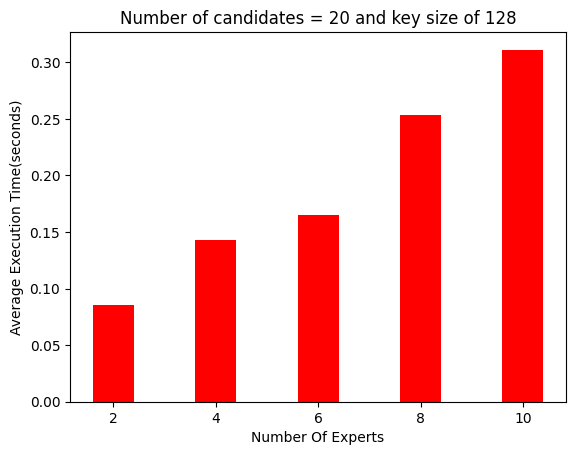

[0.08547671 0.14315882 0.16521767 0.25380215 0.31113496]


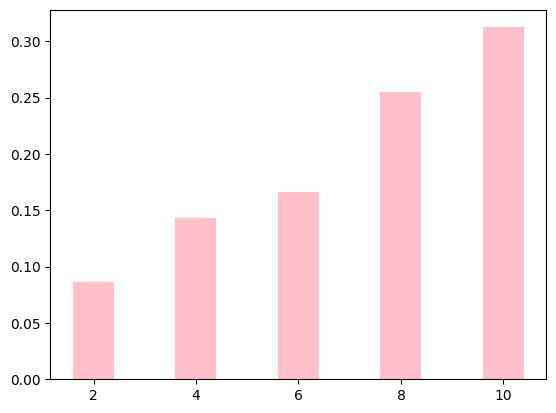

[0.08625897 0.1432197  0.16599622 0.2547005  0.3124023 ]


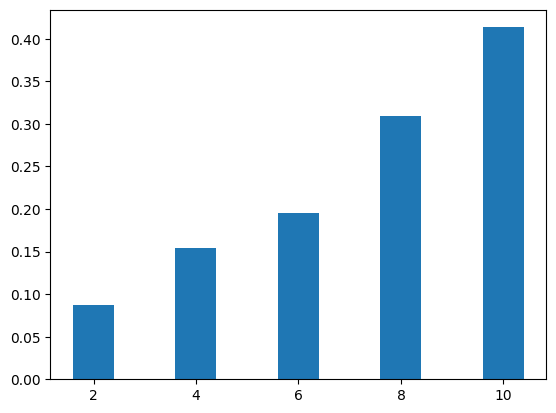

[0.08782603 0.15425389 0.19560826 0.30974257 0.4135116 ]


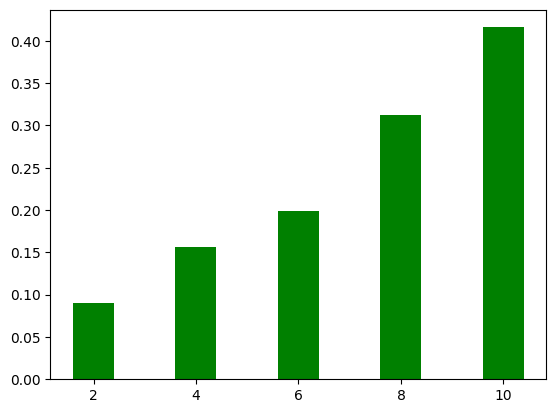

[0.09018441 0.1565581  0.19833979 0.3123145  0.4159619 ]


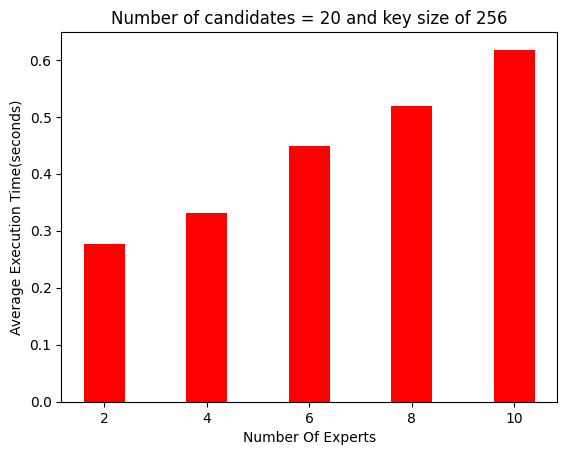

[0.27740136 0.3308278  0.4488805  0.51819104 0.6177039 ]


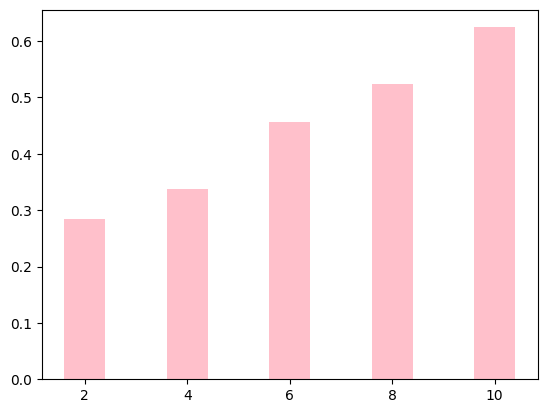

[0.28415555 0.33805454 0.45555568 0.52464306 0.6243736 ]


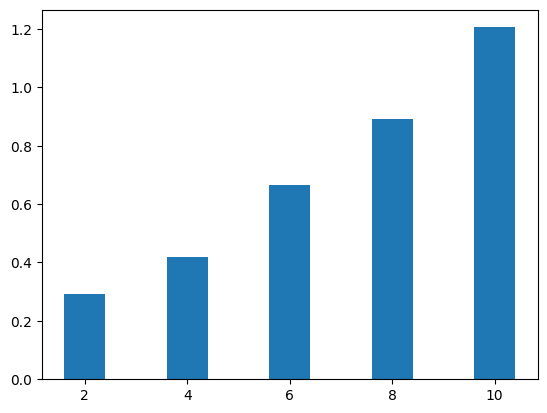

[0.29363447 0.4197821  0.66602683 0.8904126  1.2055448 ]


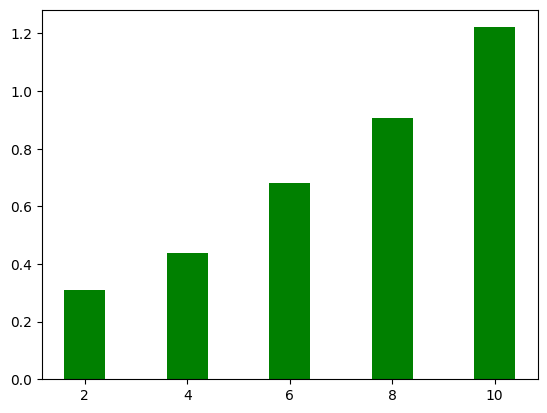

[0.31059423 0.43653837 0.6820853  0.9058234  1.2214961 ]


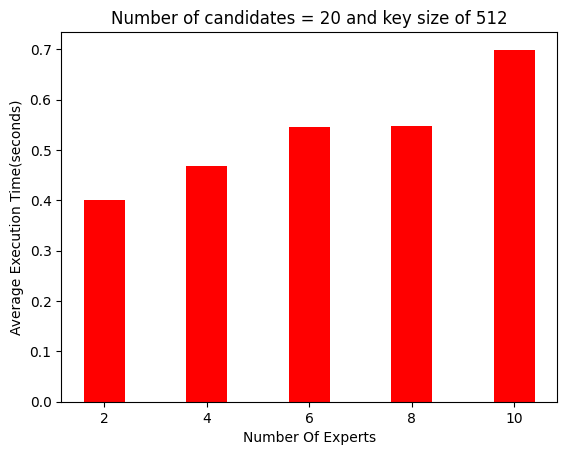

[0.39982176 0.46848363 0.54471606 0.54745674 0.69901514]


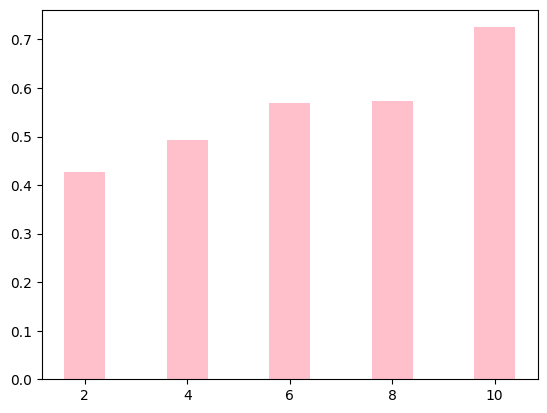

[0.4260613  0.49327517 0.5696503  0.5738877  0.72501534]


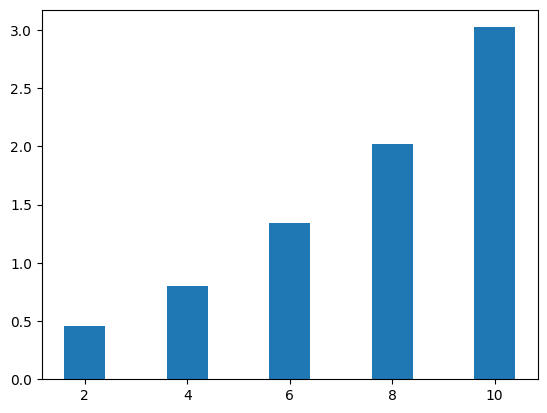

[0.45889655 0.80508614 1.3407421  2.0168483  3.023581  ]


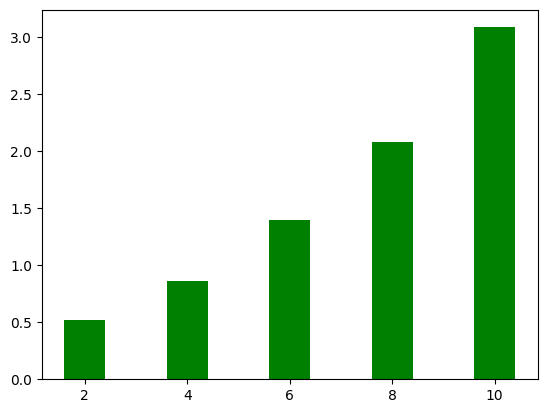

[0.51920855 0.8657864  1.3989205  2.0793543  3.08596   ]
Stored 'F1Time' (list)
Stored 'F2Time' (list)
Stored 'F3Time' (list)
Stored 'F4Time' (list)


In [82]:
keys = [128,256,512]
F1Time = []
F2Time = []
F3Time = []
F4Time = []
for i in range(0,3):
   time =  simulationHavingExpertsvariableCandidatesConst([2,4,6,8,10], 20, "experts", keys[i])
   F1Time.append(time[0])
   F2Time.append(time[1])
   F3Time.append(time[2])
   F4Time.append(time[3])
%store F1Time
%store F2Time
%store F3Time
%store F4Time


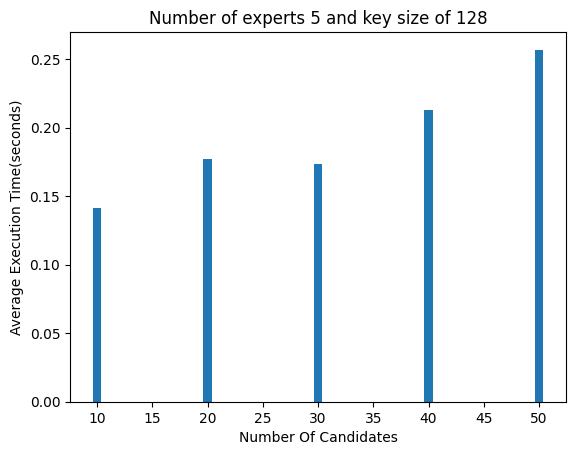

[0.14113371 0.17699395 0.17361736 0.21270423 0.25689173]


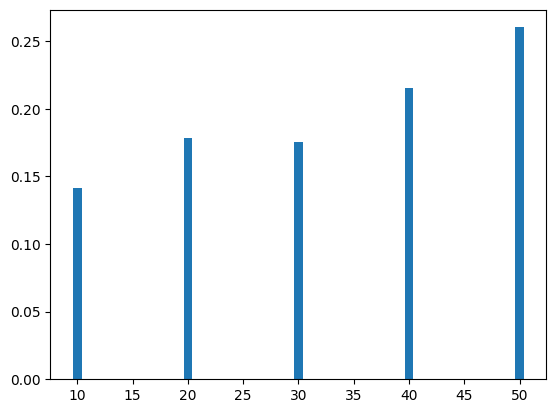

[0.14179048 0.1783124  0.17541063 0.21545875 0.26031125]


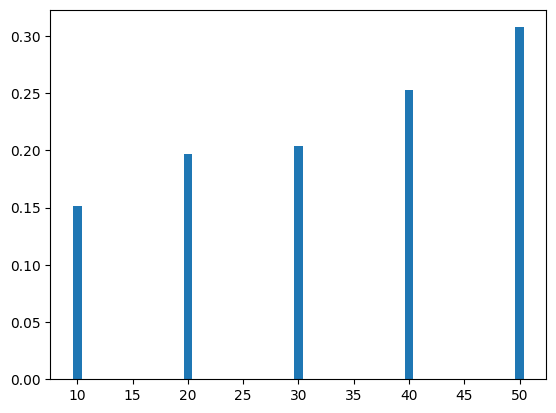

[0.15136953 0.19692676 0.20420432 0.25237194 0.30754563]


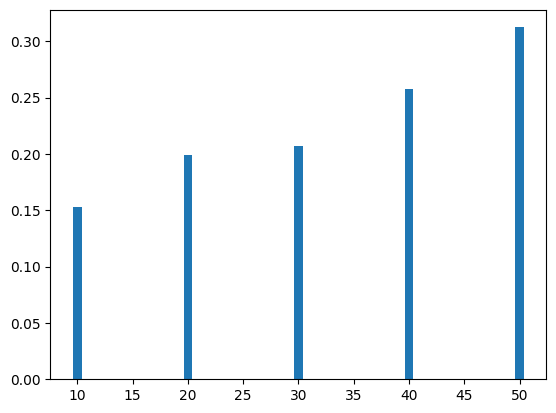

[0.15261088 0.19923761 0.20695981 0.25751382 0.31243736]


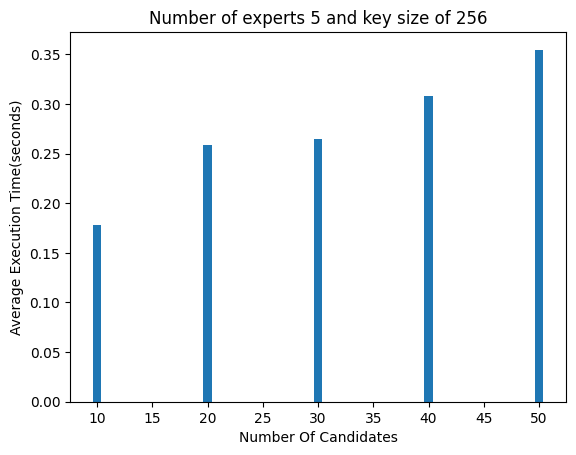

[0.17811838 0.258418   0.26476043 0.30823508 0.35473156]


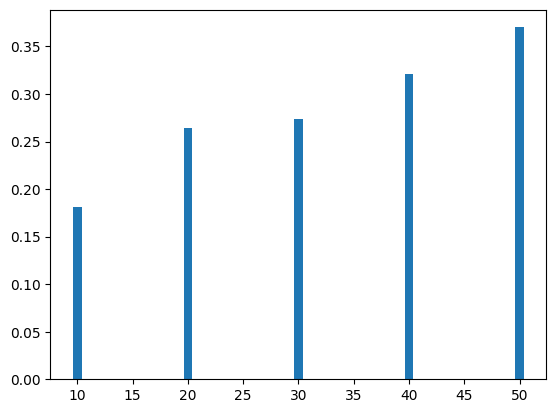

[0.18115996 0.26465747 0.27398622 0.32076374 0.3701856 ]


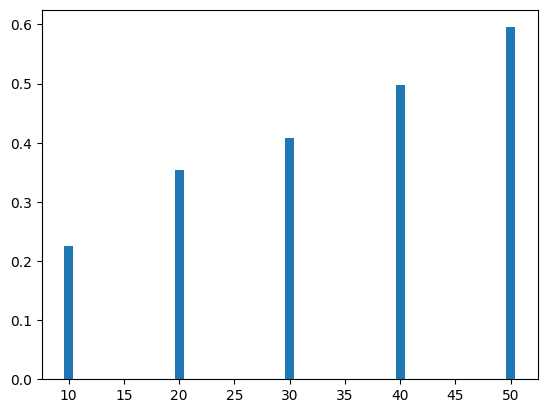

[0.22564821 0.35357904 0.40715155 0.49767643 0.5951738 ]


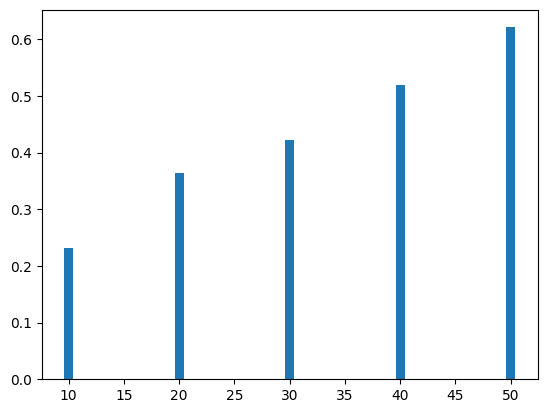

[0.2309402  0.36435896 0.42316228 0.519489   0.62129414]


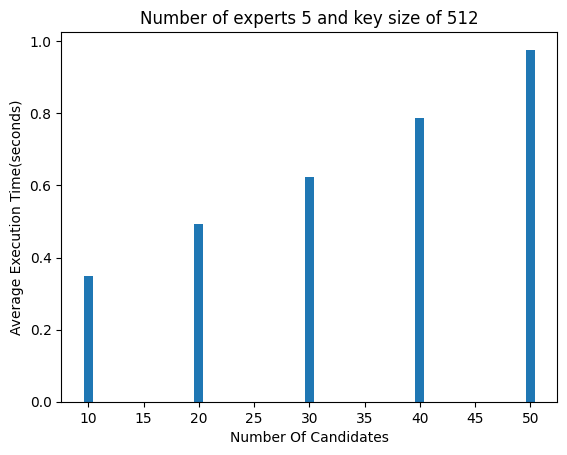

[0.34884822 0.49377578 0.6224476  0.7880251  0.9767364 ]


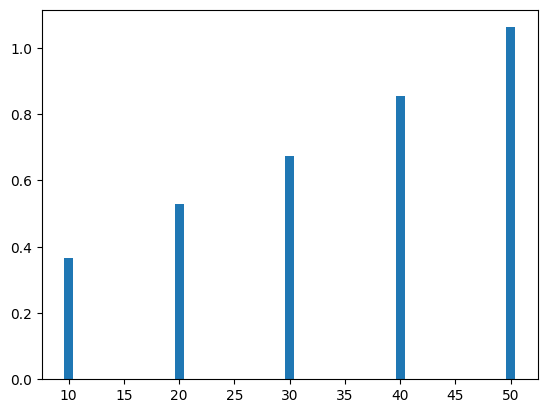

[0.36564717 0.5283977  0.6738251  0.85626733 1.0621505 ]


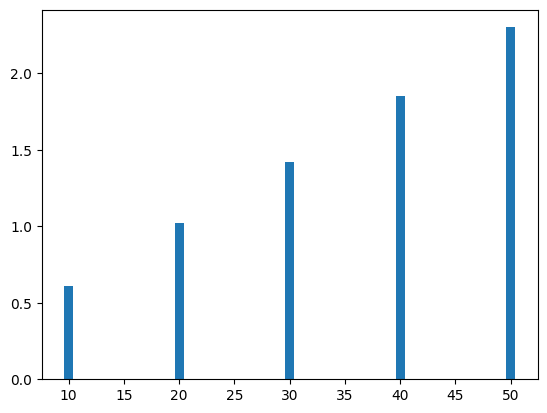

[0.611497  1.0241029 1.4178127 1.849527  2.3018117]


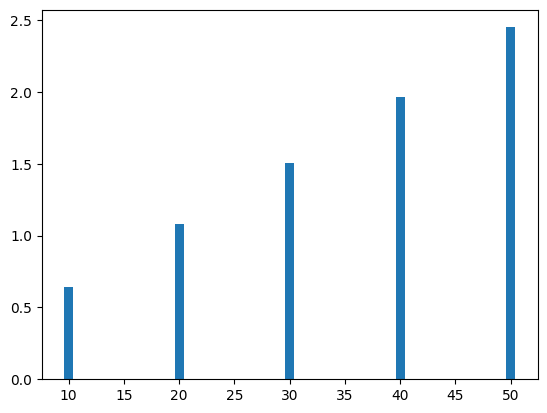

[0.64152265 1.0838702  1.5067234  1.967112   2.4499247 ]
Stored 'F1TimeCandidateVariable' (list)
Stored 'F2TimeCandidateVariable' (list)
Stored 'F3TimeCandidateVariable' (list)
Stored 'F4TimeCandidateVariable' (list)


In [83]:
keys = [128,256,512]
F1TimeCandidateVariable = []
F2TimeCandidateVariable = []
F3TimeCandidateVariable = []
F4TimeCandidateVariable = []
for i in range(0,3):
    time = simulationHavingExpertsConstCandidatesVariable(5,[10,20,30,40,50],"candidates",keys[i])
    F1TimeCandidateVariable.append(time[0])
    F2TimeCandidateVariable.append(time[1])
    F3TimeCandidateVariable.append(time[2])
    F4TimeCandidateVariable.append(time[3])
%store F1TimeCandidateVariable
%store F2TimeCandidateVariable
%store F3TimeCandidateVariable
%store F4TimeCandidateVariable

In [84]:
F1Time

[array([0.08547671, 0.14315882, 0.16521767, 0.25380215, 0.31113496],
       dtype=float32),
 array([0.27740136, 0.3308278 , 0.4488805 , 0.51819104, 0.6177039 ],
       dtype=float32),
 array([0.39982176, 0.46848363, 0.54471606, 0.54745674, 0.69901514],
       dtype=float32)]

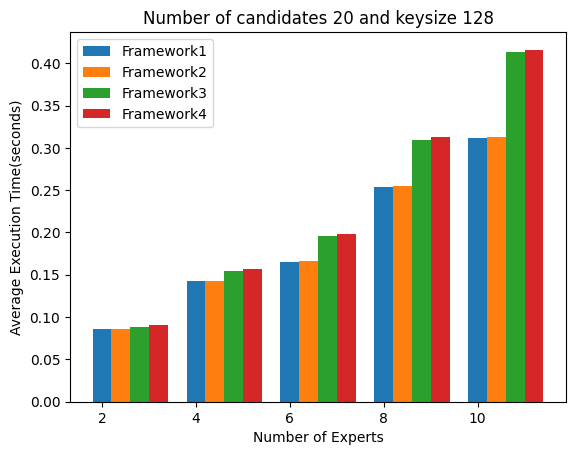

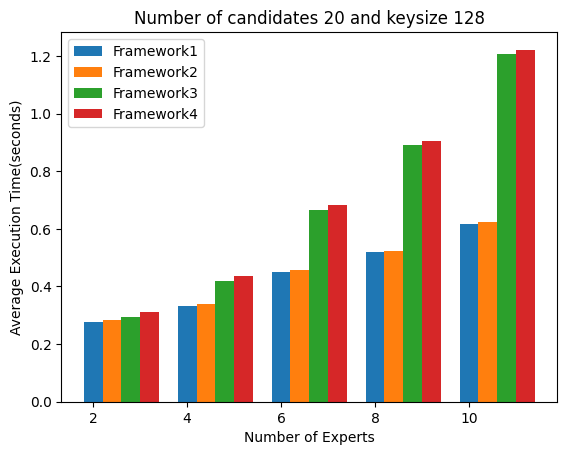

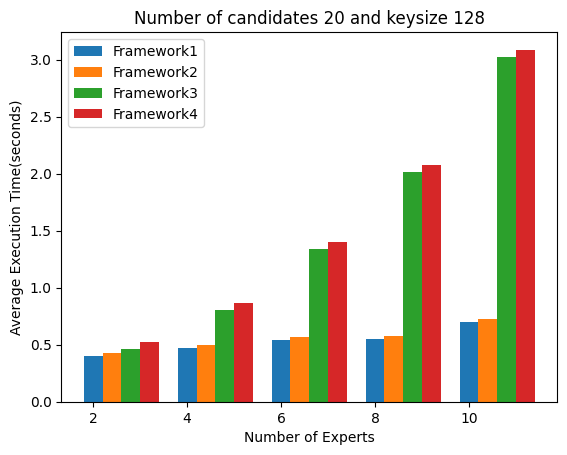

In [85]:
for i in range(0,3):
    X = [2,4,6,8,10] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    plt.bar(X_axis , F1Time[i], width, label = 'Framework1') 
    plt.bar(X_axis + width  , F2Time[i], width, label = 'Framework2') 
    plt.bar(X_axis + width * 2 , F3Time[i], width, label = 'Framework3') 
    plt.bar(X_axis + width * 3 , F4Time[i], width, label = 'Framework4') 
    
    plt.xticks(X_axis, X) 
    plt.xlabel("Number of Experts") 
    plt.ylabel("Average Execution Time(seconds)") 
    plt.title("Number of candidates 20 and keysize 128"  ) 
    plt.legend() 
    plt.show()

In [86]:
F1TimeCandidateVariable

[array([0.14113371, 0.17699395, 0.17361736, 0.21270423, 0.25689173],
       dtype=float32),
 array([0.17811838, 0.258418  , 0.26476043, 0.30823508, 0.35473156],
       dtype=float32),
 array([0.34884822, 0.49377578, 0.6224476 , 0.7880251 , 0.9767364 ],
       dtype=float32)]

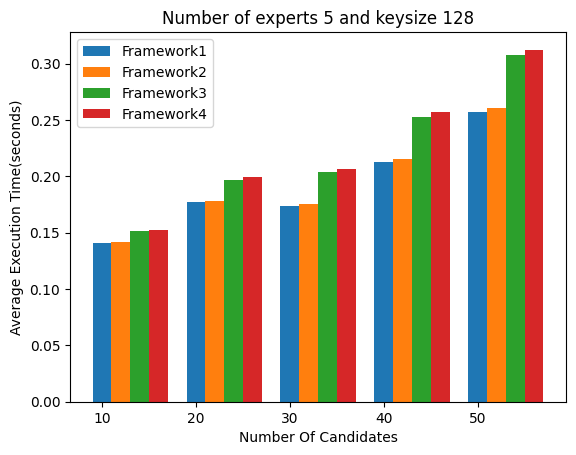

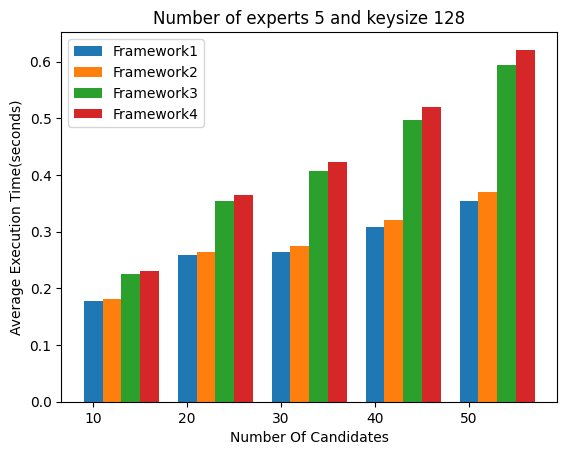

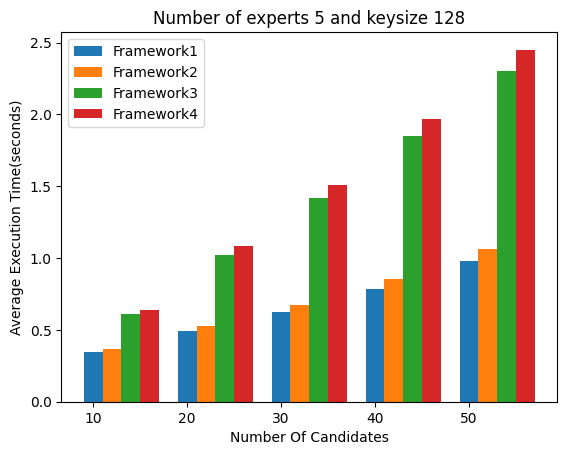

In [87]:
for i in range(0,3):
    X = [10,20,30,40,50] 
    width = 0.2
    X_axis = np.arange(len(X)) 
    plt.bar(X_axis , F1TimeCandidateVariable[i], width, label = 'Framework1') 
    plt.bar(X_axis + width  , F2TimeCandidateVariable[i], width, label = 'Framework2') 
    plt.bar(X_axis + width * 2 , F3TimeCandidateVariable[i], width, label = 'Framework3') 
    plt.bar(X_axis + width * 3 , F4TimeCandidateVariable[i], width, label = 'Framework4') 
    
    plt.xticks(X_axis, X) 
    plt.xlabel("Number Of Candidates") 
    plt.ylabel("Average Execution Time(seconds)") 
    plt.title("Number of experts 5 and keysize 128"  ) 
    plt.legend() 
    plt.show()
